In [1]:
class SVM_classifier():


  # initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
    self.ww=[]
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter



  # fitting the dataset to SVM Classifier
  def fit(self, X, Y):

    # m  --> number of Data points --> number of rows
    # n  --> number of input features --> number of columns
    self.m, self.n = X.shape
    
    # initiating the weight value and bias value
    
    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization
    
    for i in range(self.no_of_iterations):
      self.update_weights()
        


  # function for updating the weight and bias value
  def update_weights(self):
    # label encoding
    y_label = np.where(self.Y <= 0, -1, 1)


    # gradients ( dw, db)
    for index, x_i in enumerate(self.X):

      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1 
      if (condition == True):

        dw = 2 * self.lambda_parameter * self.w
        db = 0

      else:

        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]


        
      self.ww.append(self.w)
      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db
      


  # predict the label for a given input value
  def predict(self, X):

    output = np.dot(X, self.w) - self.b

    predicted_labels = np.sign(output)

    y_hat = np.where(predicted_labels <= -1, 0, 1)

    return y_hat

In [2]:
# classifier.fit(X_train, Y_train)

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
diabetes_dataset = pd.read_csv('diabetes.csv')

In [5]:
features = diabetes_dataset.drop(columns = 'Outcome', axis=1)
target = diabetes_dataset['Outcome']

In [6]:
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size = 0.2, random_state=2)

In [8]:
classifier = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter = 0.01)

In [9]:
classifier.fit(X_train, Y_train)

In [10]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)
training_data_accuracy

0.7768729641693811

In [11]:
np.array(classifier.ww).shape

(614000, 8)

In [12]:
import pickle

In [13]:
pickle.dump(SVM_classifier,open('SVM_classifier.pkl','wb'))

In [14]:
SVM=pickle.load(open('SVM_classifier.pkl','rb'))

__main__.SVM_classifier

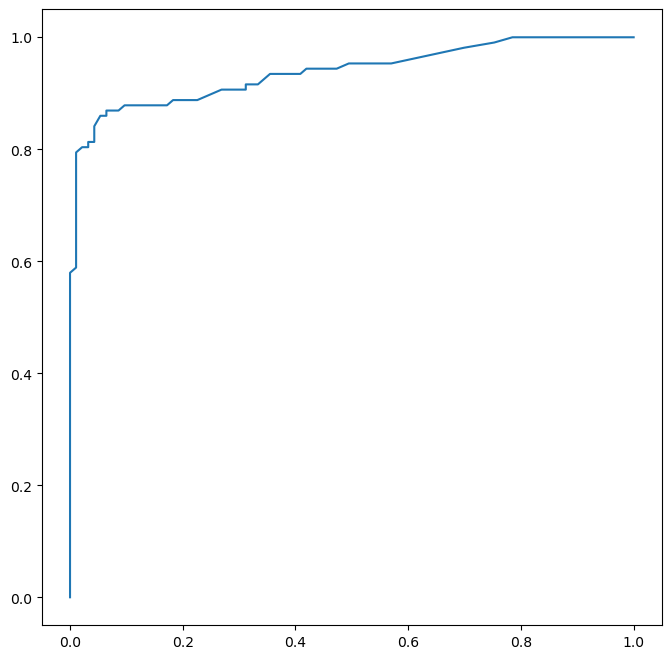